# Extended Boston Dataset, Ridge и Lasso регрессии

## Содержание
1. [Теоретическа часть](#Теоретическая-часть)
    1. [Ридж-регрессия](#Ридж-регрессия)
    2. [Лассо-регрессия](#Лассо-регрессия)
2. [Задание №1](#Задание-№1)
    1. [Постановка задачи](#Постановка-задачи)
    2. [Boston dataset](#Boston-dataset)
    3. [Extended Boston dataset (mglearn)](#Extended-Boston-dataset-(mglearn))
    4. [Extended Boston dataset (task№2)](#Extended-Boston-dataset-(task№2))
    5. [Результаты](#Результаты)
3. [Линейные методы для классификации](#Линейные-методы-для-классификации)
4. [Выводы](#Выводы)

# Теоретическая часть
## Ридж-регрессия
Гребневая регрессия также является линейной моделью регрессии, поэтому ее формула аналогична той, что используется в обычном методе линейной регрессии. В гребневой регрессии коэффициенты $\omega_i$ выбираются не только с точки зрения того, насколько хорошо они позволяют предсказывать на обучающих данных, они еще подгоняются в соответствии с дополнительным ограничением. Необходимо, чтобы величина коэффициентов была как можно меньше, т.е. все элементы w должны быть близки к нулю. Это означает, что каждый признак должен иметь как можно меньшее влияние на результат (то есть каждый признак должен иметь небольшой регрессионный коэффициент) и в то же время он должен по-прежнему обладать хорошей прогнозирующей силой. Это ограничение является примером регуляризации (regularization). Регуляризация означает явное ограничение модели для предотвращения переобучения. Регуляризация, использующаяся в гребневой регрессии, известна как L2 регуляризация.
Гребневая регрессии реализована в классе linear_model.Ridge.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from mglearn.datasets import load_extended_boston

%matplotlib notebook

boston = load_boston()
ext_boston = load_extended_boston()

Ridge – модель с более строгим ограничением, поэтому меньше вероятность переобучения. Менее сложная модель означает меньшую правильность на обучающем наборе, но лучшую обобщающую способность. Поскольку нас интересует только обобщающая способность, мы должны выбрать модель Ridge вместо модели LinearRegression при работе с extended_boston.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(
    ext_boston[0], ext_boston[1], random_state=0)

ridge = Ridge(alpha=1.0).fit(x_train, y_train)

print(f"Точность на обучающем наборе: {ridge.score(x_train, y_train):.2f}\n"
      f"Точность на тестовом наборе: {ridge.score(x_test, y_test):.2f}")

Точность на обучающем наборе: 0.89
Точность на тестовом наборе: 0.75


Модель Ridge позволяет найти компромисс между простотой модели (получением коэффициентов, близких к нулю) и качеством ее работы на обучающем наборе. Компромисс между простотой модели и качеством работы на обучающем наборе может быть задан пользователем при помощи параметра alpha. В предыдущем примере мы использовали значение параметра по умолчанию alpha=1.0. Впрочем, нет никаких причин считать, что это даст нам оптимальный компромиссный вариант. Оптимальное значение alpha зависит от конкретного используемого набора данных. Увеличение alpha заставляет коэффициенты сжиматься до близких к нулю значений, что снижает качество работы модели на обучающем наборе, но может улучшить ее обобщающую способность.

Как и следовало ожидать, независимо от объема данных правильность на обучающем наборе всегда выше правильности на тестовом наборе, как в случае использования гребневой регрессии, так и в случае использования линейной регрессии. Поскольку гребневая регрессия – регуляризированная модель, во всех случаях на обучающем наборе правильность гребневой регрессии ниже правильности линейной регрессии. Однако правильность на тестовом наборе у гребневой регрессии выше, особенно для небольших подмножеств данных. При объеме данных менее 400 наблюдений линейная регрессия не способна обучиться чему-либо. По мере возрастания объема данных, доступного для моделирования, обе модели становятся лучше и в итоге линейная регрессия догоняет гребневую регрессию. Урок здесь состоит в том, что при достаточном объеме обучающих данных регуляризация становится менее важной и при удовлетворительном объеме данных гребневая и линейная регрессии будут демонстрировать одинаковое качество работы (тот факт, что в данном случае это происходит при использовании полного набора данных, является просто случайностью).
## Лассо-регрессия
Альтернативой Ridge как метода регуляризации линейной регрессии является Lasso. Как и гребневая регрессия, лассо также сжимает коэффициенты до близких к нулю значений, но несколько иным способом, называемым L1 регуляризацией. Результат L1 регуляризации заключается в том, что при использовании лассо некоторые коэффициенты становятся равны точно нулю. Получается, что некоторые признаки полностью исключаются из модели. Это можно рассматривать как один из видов автоматического отбора признаков. Получение нулевых значений для некоторых коэффициентов часто упрощает интерпретацию модели.

In [3]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0).fit(x_train, y_train)

print(f"Точность на обучающем наборе: {lasso.score(x_train, y_train):.2f}\n"
      f"Точность на тестовом наборе: {lasso.score(x_test, y_test):.2f}\n")

print(f"Количество коэфф. omega == 0: {np.sum(lasso.coef_==0)}\n"
      f"Количество коэфф. omega != 0: {np.sum(lasso.coef_!=0)}")

Точность на обучающем наборе: 0.29
Точность на тестовом наборе: 0.21

Количество коэфф. omega == 0: 100
Количество коэфф. omega != 0: 4


Как видно из сводки, Lasso дает низкую правильность как на обучающем, так и на тестовом наборе. Это указывает на недообучение и мы видим, что из 105 признаков используются только 4. Как и Ridge, Lasso также имеет параметр регуляризации alpha, который определяет степень сжатия коэффициентов до нулевых значений. В предыдущем примере мы использовали значение по умолчанию alpha=1.0. Чтобы снизить недообучение, давайте попробуем уменьшить alpha до 0.001. При этом нам нужно увеличить значение max_iter (максимальное количество итераций)

In [4]:
lasso = Lasso(alpha=0.001, max_iter=100000).fit(x_train, y_train)

print(f"Точность на обучающем наборе: {lasso.score(x_train, y_train):.2f}\n"
      f"Точность на тестовом наборе: {lasso.score(x_test, y_test):.2f}\n")

print(f"Количество коэфф. omega == 0: {np.sum(lasso.coef_==0)}\n"
      f"Количество коэфф. omega != 0: {np.sum(lasso.coef_!=0)}")

Точность на обучающем наборе: 0.94
Точность на тестовом наборе: 0.74

Количество коэфф. omega == 0: 37
Количество коэфф. omega != 0: 67


Более низкое значение alpha позволило нам получить более сложную модель, которая продемонстрировала более высокую правильность на обучающем и тестовом наборах. Лассо работает немного лучше, чем гребневая регрессия, и мы используем лишь 33 признака из 105. Это делает данную модель более легкой с точки зрения интерпретации.
Однако, если мы установим слишком низкое значение alpha, мы снова нивелируем эффект регуляризации и получим в конечном итоге переобучение, придя к результатам, аналогичным результатам линейной регрессии.

На практике, когда стоит выбор между гребневой регрессией и лассо, предпочтение, как правило, отдается гребневой регрессии. Однако, если у вас есть большое количество признаков и есть основания считать, что лишь некоторые из них важны, Lasso может быть оптимальным выбором. Аналогично, если вам нужна легко интерпретируемая модель, Lasso
поможет получить такую модель, так как она выберет лишь подмножество входных признаков. В библиотеке scikit-learn также имеется класс ElasticNet, который сочетает в себе штрафы Lasso и Ridge На практике эта комбинация работает лучше всего, впрочем, это достигается за счет двух корректируемых параметров: один для L1 регуляризации, а другой – для L2 регуляризации.
# Задание №1
## Постановка задачи
Дано три датасета:
* Обычный Boston dataset;
* Extended Boston dataset из пакета mglearn;
* Extended Boston dataset из [второго задания]().

Необходимо определить методом кросс-валидации оптимальные гиперпараметры для моделей, обученные ридж и лассо регрессиями на всех трех датасетах, сравнить их точность.
## Boston dataset

In [5]:
alphas = 10.**np.arange(-15, 2)
print(alphas)

tol = 0.15  # The tolerance for the optimization in LassoCV. Default tol=0.0001


def model_info(model):

    print(f"Best alpha: {model.alpha_}\n",
          f"Scores:",
          f"Train: {model.score(x_train, y_train):.2f}",
          f"Test: {model.score(x_test, y_test):.2f}\n",
          f"Amount of omega == 0: {np.sum(model.coef_==0)}",
          f"Amount of omega != 0: {np.sum(model.coef_!=0)}",
          sep="\n")

    return (model.alpha_,
            model.score(x_train, y_train),
            model.score(x_test, y_test))

[1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07 1.e-06
 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


### RidgeCV

In [6]:
from sklearn.linear_model import RidgeCV

x_train, x_test, y_train, y_test = train_test_split(
    boston['data'], boston['target'], random_state=0)

ridgeCV = RidgeCV(alphas).fit(x_train, y_train)

scores = {}
scores['Ridge\nBoston'] = model_info(ridgeCV)

Best alpha: 0.1

Scores:
Train: 0.77
Test: 0.63

Amount of omega == 0: 0
Amount of omega != 0: 13


### LassoCV

In [7]:
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(alphas=alphas, tol=tol).fit(x_train, y_train)

scores['Lasso\nBoston'] = model_info(lassoCV)

Best alpha: 1e-15

Scores:
Train: 0.76
Test: 0.61

Amount of omega == 0: 0
Amount of omega != 0: 13


## Extended Boston dataset (mglearn)

### RidgeCV

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    ext_boston[0], ext_boston[1], random_state=0)

ridgeCV = RidgeCV(alphas).fit(x_train, y_train)

scores['Ridge\nExtBoston\nmglearn'] = model_info(ridgeCV)

Best alpha: 0.1

Scores:
Train: 0.93
Test: 0.77

Amount of omega == 0: 0
Amount of omega != 0: 104


### LassoCV

In [9]:
lassoCV = LassoCV(alphas=alphas, tol=tol).fit(x_train, y_train)

scores['Lasso\nExtBoston\nmglearn'] = model_info(lassoCV)

Best alpha: 1e-05

Scores:
Train: 0.84
Test: 0.70

Amount of omega == 0: 0
Amount of omega != 0: 104


## Extended Boston dataset (task№2)

### RidgeCV

In [10]:
from datasets import extended_boston

X, y = extended_boston()

x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

ridgeCV = RidgeCV(alphas).fit(x_train, y_train)

scores['Ridge\nExtBoston\ntask2'] = model_info(ridgeCV)

Best alpha: 1.0

Scores:
Train: 0.95
Test: 0.61

Amount of omega == 0: 0
Amount of omega != 0: 104


### LassoCV

In [11]:
lassoCV = LassoCV(alphas=alphas, tol=tol).fit(x_train, y_train)

scores['Lasso\nExtBoston\ntask2'] = model_info(lassoCV)

Best alpha: 1e-15

Scores:
Train: 0.83
Test: 0.70

Amount of omega == 0: 0
Amount of omega != 0: 104


## Результаты

<IPython.core.display.Javascript object>


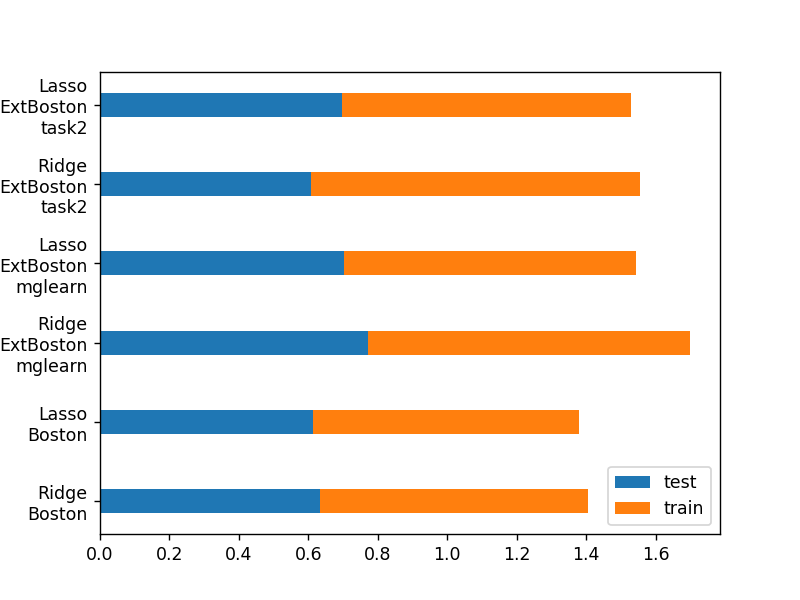

In [12]:
labels = list(scores.keys())
train = [x[1] for x in scores.values()]
test = [x[2] for x in scores.values()]

width = 0.3

fig, ax = plt.subplots()
ax.barh(labels, test, width,
        label='test')
ax.barh(labels, train, width,
        left=test,
        label='train')

ax.legend()


# Линейные методы для классификации

Линейные модели также широко используются в задачах классификации.
Двумя наиболее распространенными алгоритмами линейной классификации являются логистическая регрессия (logistic regression), реализованная в классе linear_model.LogisticRegression, и линейный метод опорных векторов (linear support vector machines) или линейный SVM, реализованный в классе svm.LinearSVC (SVC расшифровывается как support vector classifier – классификатор опорных векторов). Несмотря на свое название, логистическая регрессия является алгоритмом классификации, а не алгоритмом регрессии, и его не следует путать с линейной регрессией.
Обе модели имеют схожие границы принятия решений. По умолчанию обе модели используют L2 регуляризацию, тот же самый метод, который используется в гребневой регрессии.
Для LogisticRegression и LinearSVC компромиссный параметр, который определяет степень регуляризации, называется C, и более высокие значения C соответствуют меньшей регуляризации. Другими словами, когда вы используете высокое значение параметра C, LogisticRegression и LinearSVC пытаются подогнать модель к обучающим данным как можно лучше, тогда как при низких значениях параметра C модели делают больший акцент на поиске вектора коэффициентов (w), близкого к нулю.

In [13]:
# применить методы LinearSVC и Логистическую регрессию для классификации набора данных breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

# Выводы

Основной параметр линейных моделей – параметр регуляризации, называемый alpha в моделях регрессии и C в LinearSVC и LogisticRegression. Большие значения alpha или маленькие значения C означают простые модели. Конкретно для регрессионных моделей настройка этих параметров имеет весьма важное значение. Как правило, поиск C и alpha осуществляется по логарифмической шкале. Кроме того вы должны решить, какой вид регуляризации нужно использовать: L1 или L2. Если вы полагаете, что на самом деле важны лишь некоторые признаки, следует использовать L1. В противном случае используйте установленную по умолчанию L2 регуляризацию. Еще L1 регуляризация может быть полезна, если интерпретируемость модели имеет важное значение. Поскольку L1 регуляризация будет использовать лишь несколько признаков, легче будет объяснить, какие признаки важны для модели и каковы эффекты этих признаков.
Линейные модели очень быстро обучаются, а также быстро прогнозируют. Они масштабируются на очень большие наборы данных, а также хорошо работают с разреженными данными. При работе с данными, состоящими из сотен тысяч или миллионов примеров, вас, возможно, заинтересует опция solver='sag' в LogisticRegression и Ridge, которая позволяет получить результаты быстрее, чем настройки по умолчанию. Еще пара опций – это класс SGDClassifier и класс SGDRegressor, реализующие более масштабируемые версии описанных здесь линейных моделей.
Еще одно преимущество линейных моделей заключается в том, что они позволяют относительно легко понять, как был получен прогноз, при помощи формул, которые мы видели ранее для регрессии и классификации. К сожалению, часто бывает совершенно не понятно, почему были получены именно такие коэффициенты. Это особенно актуально, если ваш набор данных содержит высоко коррелированные признаки, в таких случаях коэффициенты сложно интерпретировать.
Как правило, линейные модели хорошо работают, когда количество признаков превышает количество наблюдений. Кроме того, они часто используются на очень больших наборах данных, просто потому, что не представляется возможным обучить другие модели. Вместе с тем в низкоразмерном пространстве альтернативные модели могут показать более высокую обобщающую способность.